In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
#可視化のためのセットです

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from pandas_datareader import DataReader

In [5]:
from datetime import datetime

In [6]:
#米国の株式市場を調べる

In [7]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [8]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [9]:
for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,189.522431,185.786972,187.659483,187.661714,3.266520e+07,186.070328
std,22.292105,22.016029,22.150496,22.173781,1.417762e+07,21.933240
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,173.035004,169.724998,171.320000,171.004997,2.283110e+07,170.214981
50%,187.399994,184.940002,186.289993,186.050003,2.918400e+07,184.223236
75%,209.375000,205.784996,207.320000,207.760002,3.907040e+07,205.900421
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


上の味方
open 初値
High その日の最高値
Low 最低値
close 終値
volume 出来高
Adj Close 調整した終値


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-03-09 to 2019-03-08
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


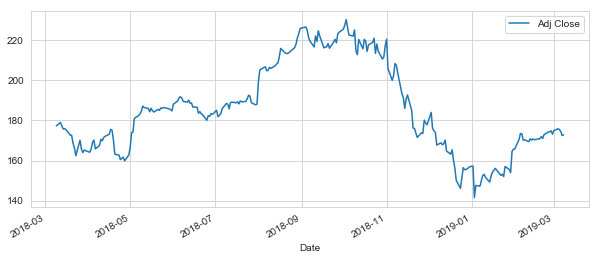

In [12]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))
#legend:凡例()
#一年間のappleの株価が見れる

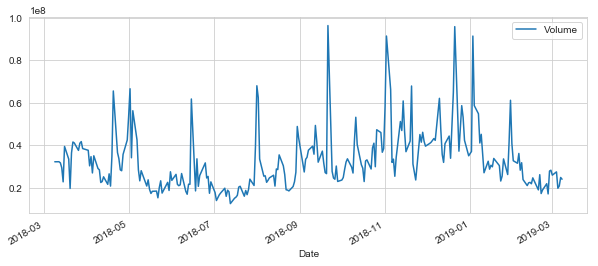

In [13]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [14]:
#移動平均線(→x日の株価を平均して表示するために行う)
ma_day=[10,20,50]
for ma in ma_day:
    column_name='MA {}'.format(ma)
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()
    

In [15]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2018-03-09,180.000000,177.389999,177.960007,179.979996,32185200.0,177.280518,NaN,NaN,NaN
2018-03-12,182.389999,180.210007,180.289993,181.720001,32207100.0,178.994415,NaN,NaN,NaN
2018-03-13,183.500000,179.240005,182.589996,179.970001,31693500.0,177.270660,NaN,NaN,NaN
2018-03-14,180.520004,177.809998,180.320007,178.440002,29368400.0,175.763611,NaN,NaN,NaN
2018-03-15,180.240005,178.070007,178.500000,178.649994,22743800.0,175.970459,NaN,NaN,NaN


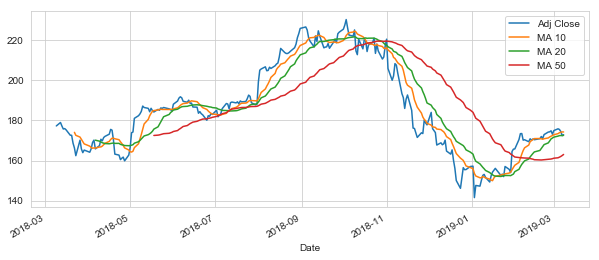

In [16]:
AAPL[['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(10,4))
#subplot: columnを個別に表示したいときに指定。
#       デフォルトは全部を一つのグラフに表示するFalse
#       Trueにするとsharex,sharey,layoutが使える
#       layout は構成を指定するパラメータ(行,列)
#plt.subplot(行数,列数,プロット番号)
#figsize: 図のサイズを決めている単位はインチでデフォルトが(8,6)

平均線の方が滑らかなのがわかる

In [17]:
#株価で重要なのは前日の終値と今日の終値の比較

In [18]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
#pct_change:percent change 変化率

In [19]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2018-03-09,180.000000,177.389999,177.960007,179.979996,32185200.0,177.280518,NaN,NaN,NaN,NaN
2018-03-12,182.389999,180.210007,180.289993,181.720001,32207100.0,178.994415,NaN,NaN,NaN,0.009668
2018-03-13,183.500000,179.240005,182.589996,179.970001,31693500.0,177.270660,NaN,NaN,NaN,-0.009630
2018-03-14,180.520004,177.809998,180.320007,178.440002,29368400.0,175.763611,NaN,NaN,NaN,-0.008501
2018-03-15,180.240005,178.070007,178.500000,178.649994,22743800.0,175.970459,NaN,NaN,NaN,0.001177


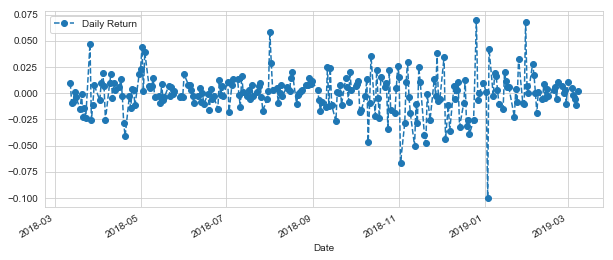

In [20]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\mkou0\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


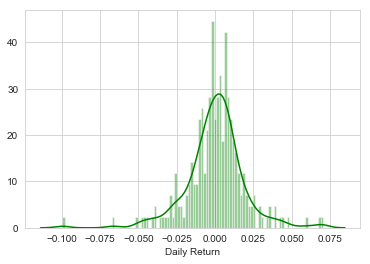

In [21]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='green')
#distplot ヒストグラムとカーネル密度推定をかける

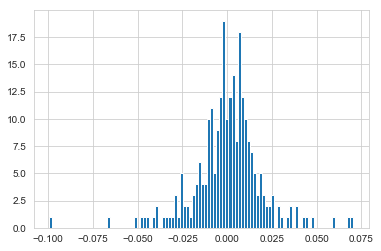

In [22]:
AAPL['Daily Return'].hist(bins=100)
#ただのヒストグラムのみ

In [23]:
closing_df=DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [24]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-03-09,177.280518,1578.890015,1160.040039,94.937538
2018-03-12,178.994415,1598.390015,1164.500000,95.163712
2018-03-13,177.270660,1588.180054,1138.170044,92.842896
2018-03-14,175.763611,1591.000000,1149.489990,92.292183
2018-03-15,175.970459,1582.319946,1149.579956,92.616714


In [25]:
tech_rets=closing_df.pct_change()

In [26]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-03-09,NaN,NaN,NaN,NaN
2018-03-12,0.009668,0.012350,0.003845,0.002382
2018-03-13,-0.009630,-0.006388,-0.022611,-0.024388
2018-03-14,-0.008501,0.001776,0.009946,-0.005932
2018-03-15,0.001177,-0.005456,0.000078,0.003516


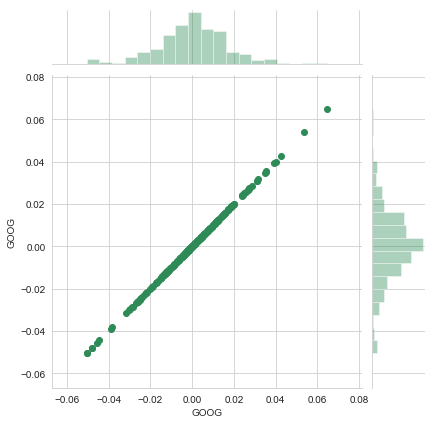

In [27]:
#会社同士で比較してみる
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

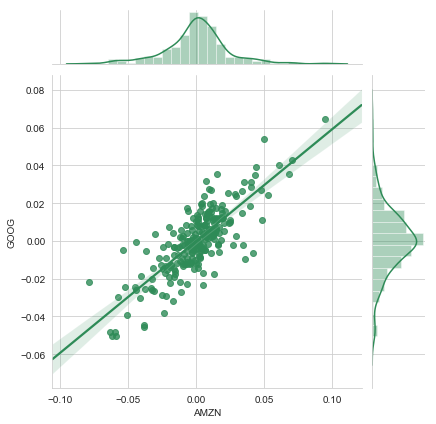

In [28]:
sns.jointplot('AMZN','GOOG',tech_rets,kind='reg',color='seagreen')

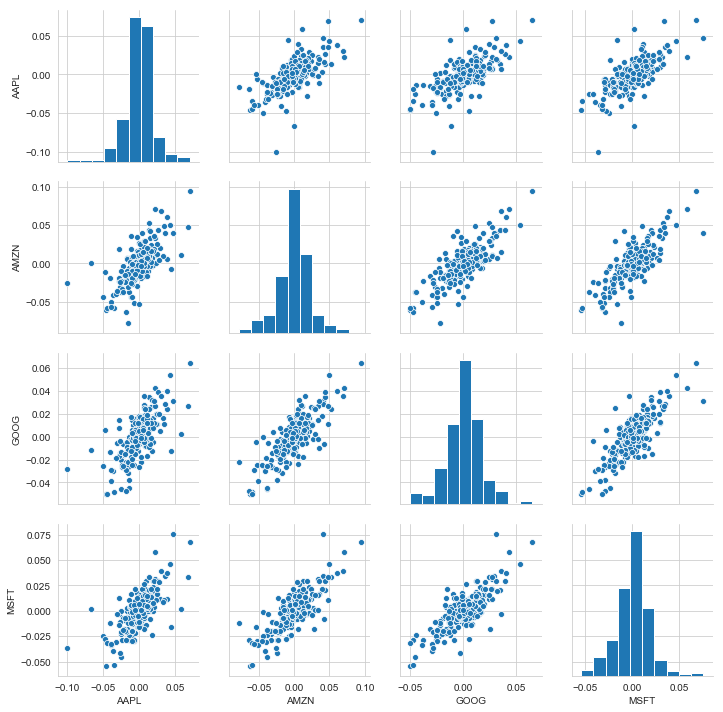

In [29]:
sns.pairplot(tech_rets.dropna())

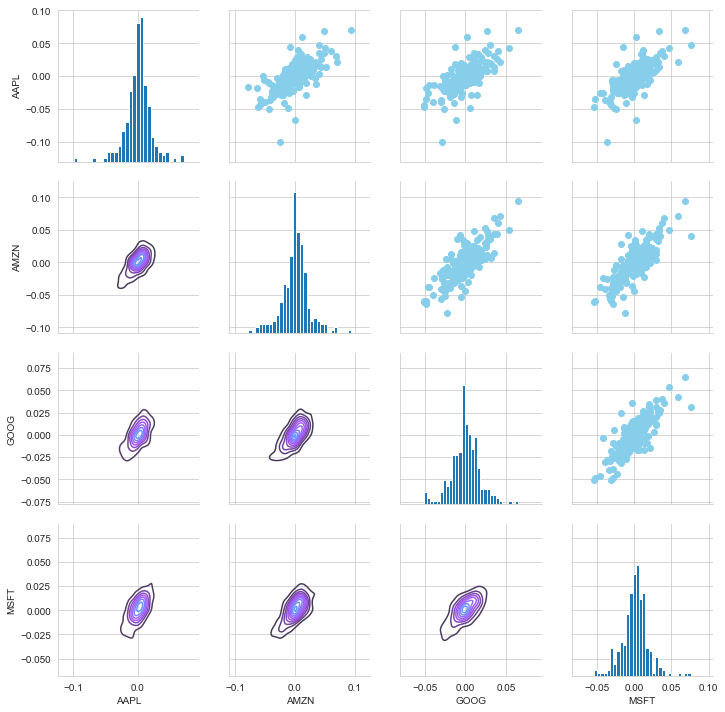

In [30]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='skyblue')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

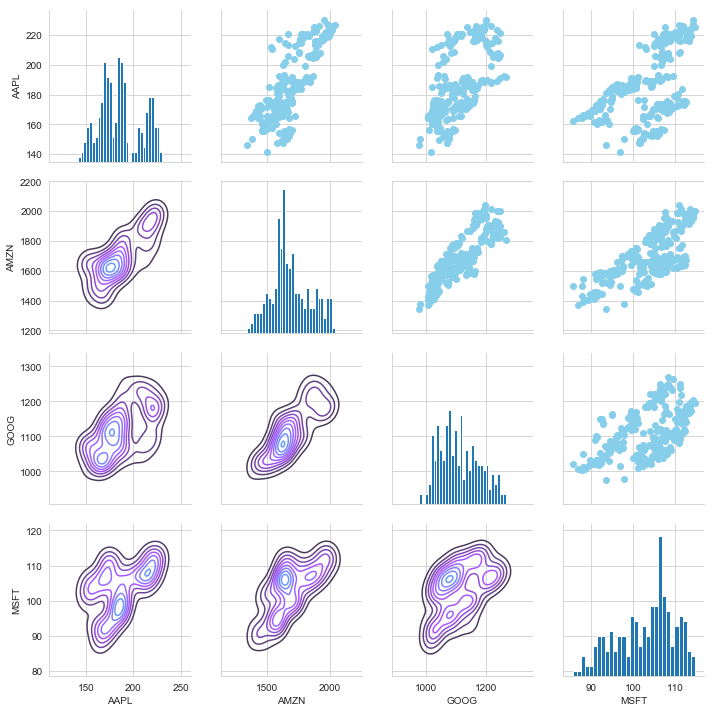

In [31]:
returns_fig=sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='skyblue')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

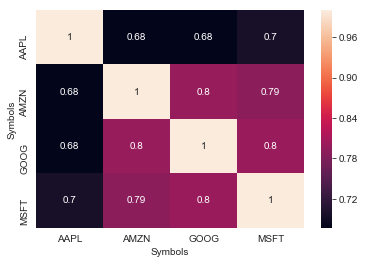

In [32]:
sns.heatmap(tech_rets.corr(),annot=True)

In [33]:
rets=tech_rets.dropna()

In [34]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-03-12,0.009668,0.012350,0.003845,0.002382
2018-03-13,-0.009630,-0.006388,-0.022611,-0.024388
2018-03-14,-0.008501,0.001776,0.009946,-0.005932
2018-03-15,0.001177,-0.005456,0.000078,0.003516
2018-03-16,-0.003526,-0.006724,-0.012048,0.004460


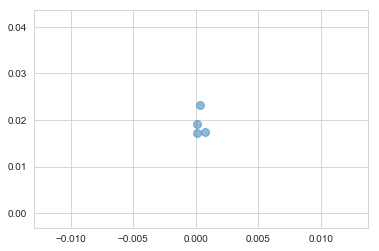

In [35]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=np.pi*20)


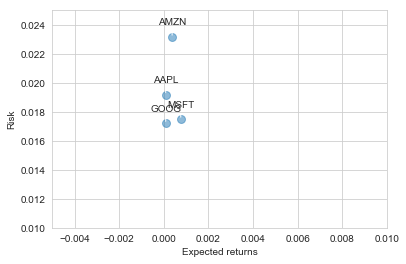

In [46]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=np.pi*20)
plt.ylim([0.01,0.025])
plt.xlim([-0.005,0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(0,10),
                textcoords='offset points',ha='center',va='bottom',
                arrowprops=dict(arrowstyle='-',connectionstyle='arc3'))

C:\Users\mkou0\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


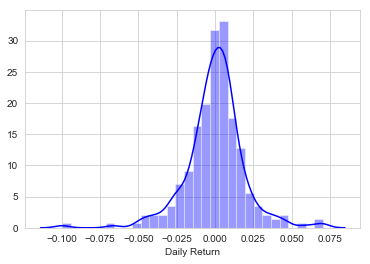

In [47]:
#バリューアンドリスク
sns.distplot(AAPL['Daily Return'].dropna(),bins=30,color='blue')

In [48]:
rets['AAPL'].quantile(0.05)

-0.029930148516846986

In [49]:
days=365
dt=1/days
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [61]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

In [62]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-09,1160.800049,1132.461060,1136.000000,1160.040039,2128000,1160.040039
2018-03-12,1177.050049,1157.420044,1163.849976,1164.500000,2172300,1164.500000
2018-03-13,1176.760010,1133.329956,1170.000000,1138.170044,1907200,1138.170044
2018-03-14,1158.589966,1141.439941,1145.209961,1149.489990,1291400,1149.489990
2018-03-15,1161.079956,1134.540039,1149.959961,1149.579956,1395400,1149.579956


Text(0.5, 1.0, 'Monte Carlo Analysis')

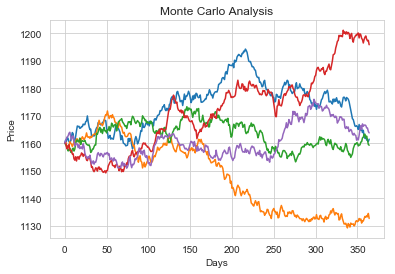

In [65]:
start_price=GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [67]:
runs=10000
simulations=np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

(array([1., 0., 0., ..., 1., 0., 1.]),
 array([1088.36788046, 1089.16390275, 1089.95992504, ..., 1245.98029374,
        1246.77631603, 1247.57233832]),
 <a list of 200 Patch objects>)

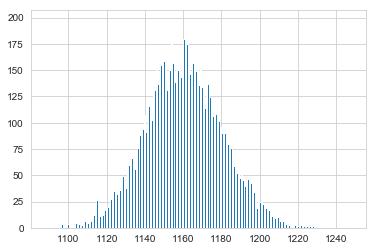

In [70]:
plt.hist(simulations,bins=200)

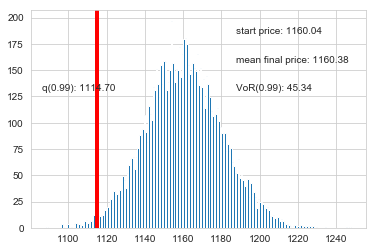

In [77]:
q=np.percentile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s='start price: {:0.2f}'.format(start_price))
plt.figtext(0.6,0.7,'mean final price: {:0.2f}'.format(simulations.mean()))
plt.figtext(0.6,0.6,'VoR(0.99): {:0.2f}'.format(start_price-q))
plt.figtext(0.15,0.6,'q(0.99): {:0.2f}'.format(q))

plt.axvline(x=q,linewidth=4,color='r')